## Code to extract trend line from a graph ##

####  Similar to *[DataThief](https://datathief.org)*, which is great, but not always practical when the data are messy ####

After defining coordinates on your plot a trend line can be fit and its coordinates converted to those of the image, allowing you to use this is an overlay on another image.

The steps are:
- Choose directory and read in image
- Define reference points on plot
- Annotate lines and adjust to coincide with the reference points
- Overlay and adjust polyline to coincide with data points
- Output array containing the transformed polyline coordinates which can be overlaid on your own plot

It's a bit clunky on Jupyter, but it does the job. 

An interactive version with coordinates being obtained via clicking was attempted, but this had too many dependencies.

The test image, fgc+11_Fig5.png' from *[ALFALFA H I data stacking – I. Does the bulge quench ongoing star
formation in early-type galaxies?](https://ui.adsabs.harvard.edu/abs/2011MNRAS.411..993F/abstract)* for which the code was originally written, since the data points are fairly indistinguishable and the trend is not straight.

Can even be used on spectra, if you have the patience, e.g. 1555-140.dat-v_HI_1420.png


In [86]:
import matplotlib
matplotlib.use('nbagg') # ALLOWS ZOOMING OF PLOT
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import os
import sys
import glob
import numpy as np
from ipywidgets import widgets
from IPython.display import display

**Enter the full path to the image file** <br>
e.g. /Users/stephencurran/steviecurran.github.io/trend_thief/

Depending on OS, but a dot ( . ) on its own may work for the current directory

In [87]:
path = str(input("Path name to the image file?  "))

Path name to the image file?  .


**Select file type and name**

In [88]:
types = ['png','jpg','jpeg','gif','pdf','tiff','HEIC']
dropdown_t = widgets.Dropdown(options=types, description="File type:")
display(dropdown_t)

Dropdown(description='File type:', options=('png', 'jpg', 'jpeg', 'gif', 'pdf', 'tiff', 'HEIC'), value='png')

In [89]:
files = glob.glob(os.path.join(path , "*.%s" %(dropdown_t.value)))
dropdown_i = widgets.Dropdown(options=files, description="File name:")
display(dropdown_i)

Dropdown(description='File name:', options=('./1555-140.dat-v_HI_1420.png', './fgc+11_Fig5.png', './0108+388_H…

**Display image**

<IPython.core.display.Javascript object>


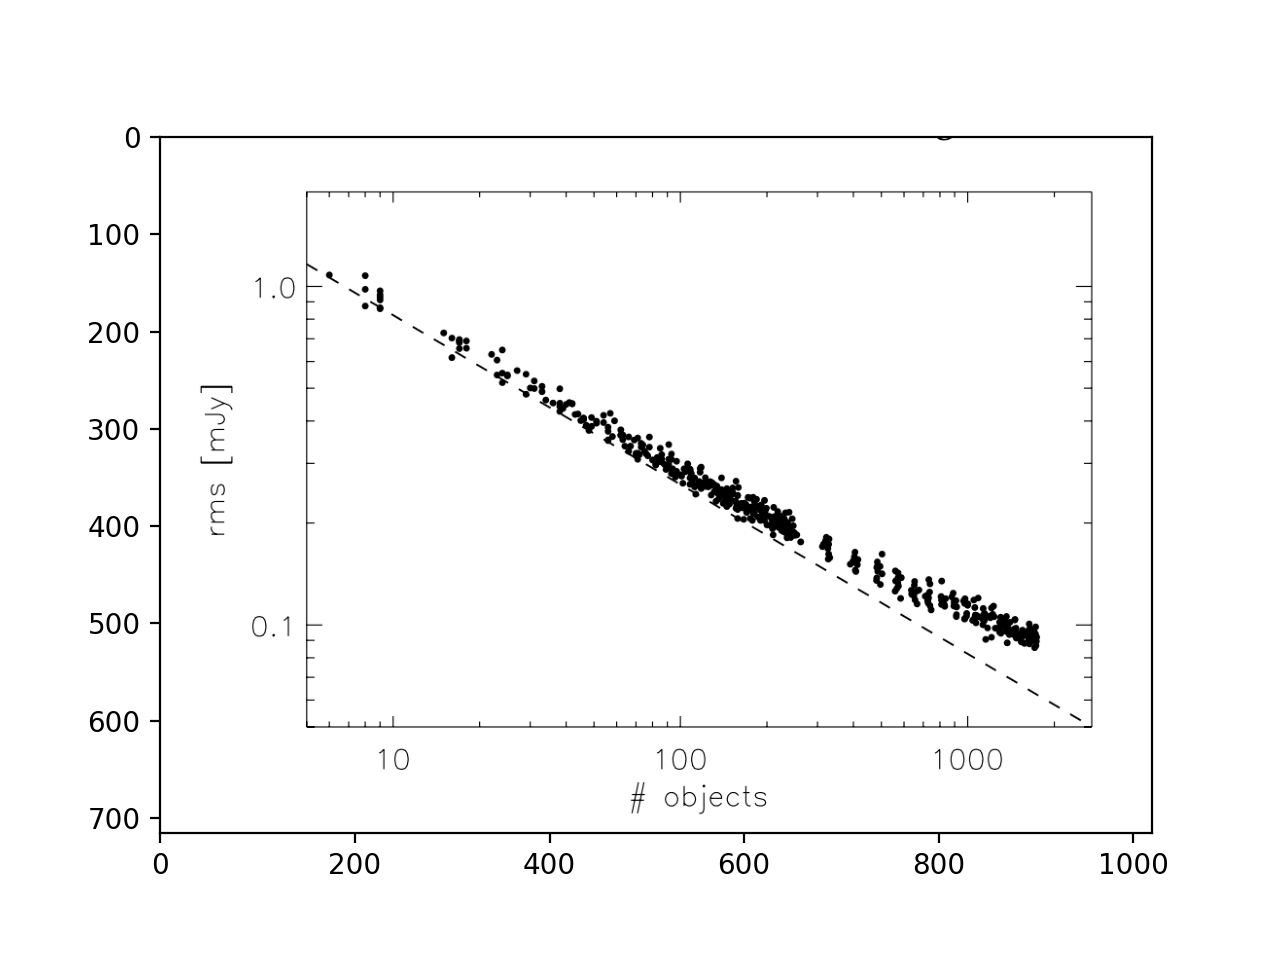

In [90]:
def img_show(ann,pline,log,conv,show):
    image = dropdown_i.value
    img = Image.open(image)
    width, height = img.size
    draw = ImageDraw.Draw(img)
    global ic

    if ann == True:
        draw.line((ac[0], 0, ac[0], height - 1), fill="lime", width=3)
        draw.line((ac[2], 0, ac[2], height - 1), fill="lime", width=3)
        draw.line((0,ac[1], width-1, ac[1]), fill="lime", width=3)
        draw.line((0,ac[3], width-1, ac[3]), fill="lime", width=3)
        
        if pline == True:
            draw.line(pc, fill="red", width=5) 
        if log == 'ln':
            ic = [np.log(x) for x in ic]
        elif log == 'log_10':
            ic = [np.log10(x) for x in ic]
        else:
            ic = [x for x in ic]
          
        def xconv(x):
            m = (ic[2] - ic[0])/(ac[2] - ac[0]);
            a = ac[0]; b = ic[0]
            return m*(x-a)+b
        def yconv(x):
            m = (ic[3] - ic[1])/(ac[3] - ac[1]);
            a = ac[1]; b = ic[1]
            return m*(x-a)+b  
        
        if conv == True:
            conv_coords = []
            for i in range(0,len(pc)):
                if i%2 == 0: 
                    conv_coords.append(xconv(pc[i]))
                else:
                    conv_coords.append(yconv(pc[i]))
        
            print('The converted polyline coordinate pairs are'); #print(conv_coords)
            cc =  np.reshape(conv_coords,(-1,2)); print(cc)
            
            if log != 'Linear':
                print('Linear values are')
                if log == 'ln':
                    l = [np.exp(x) for x in conv_coords]
                elif log == 'log_10':
                    l = [10**x for x in conv_coords]
                cc =  np.reshape(l,(-1,2)); print(cc)
            
    plt.imshow(img)
    if show == True:
        plt.show()
img_show(ann=False,pline=False,log=False,conv=False,show=True)

**Enter reference coordinates for the original plot as ax = [x1, y1,x2, y2]** <br> E.g. ic = [10,1,1000,0.1]

In [91]:
ic = [10,1,1000,0.1]

**Use the cursor to enter the corresponding image axis coordinates as ic = [x1,y1,x2,y2]**<br>
Coordinates are relative to top left corner<br>
E.g. ac = [240,153,830,500]

<IPython.core.display.Javascript object>


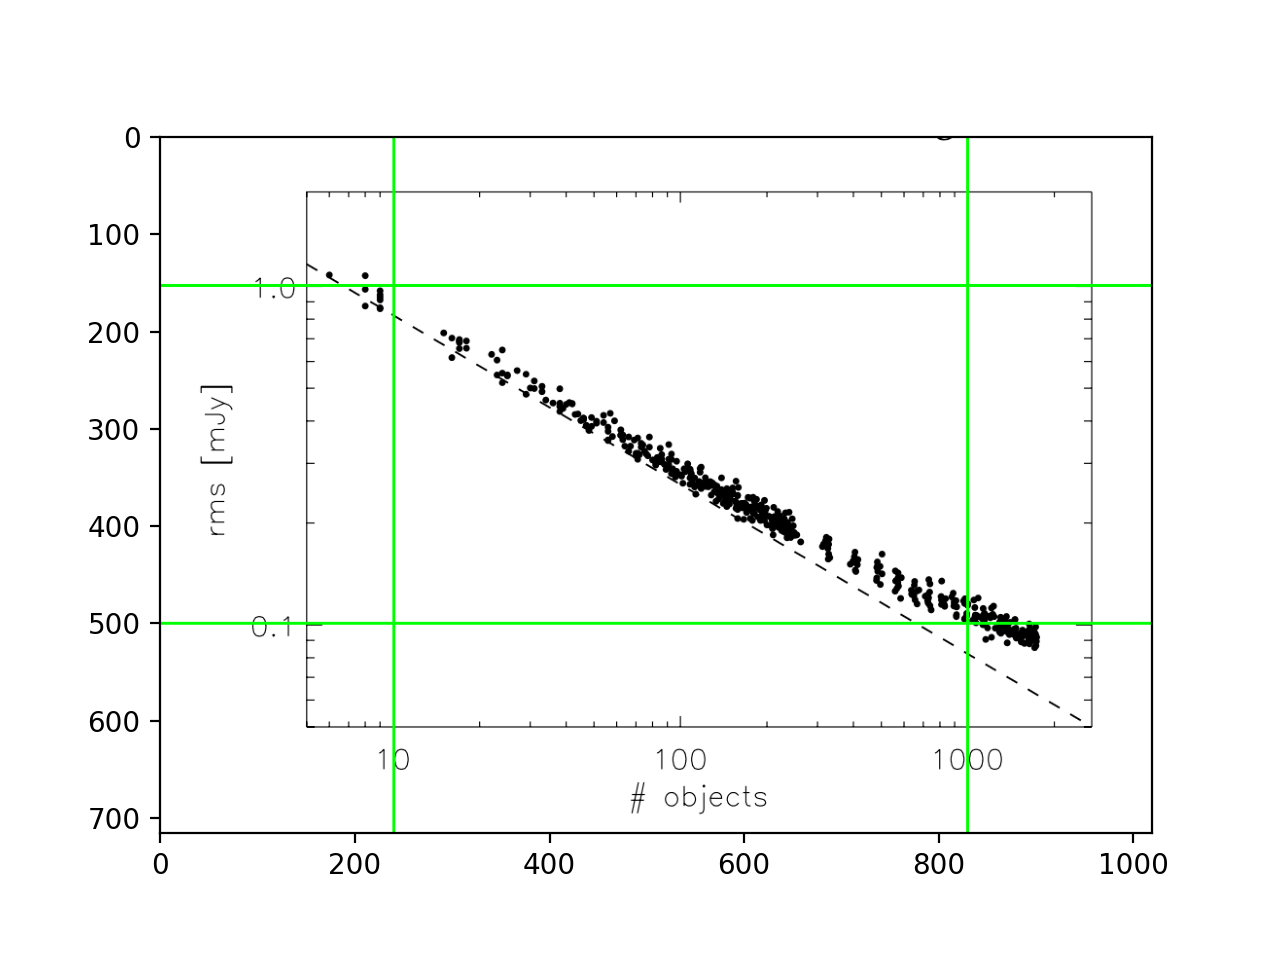

In [92]:
ac = [240,153,830,500] 
img_show(ann=True,pline=False,log=False,conv=False,show=True)

**Update *ac* until satsified that your image lines pass through the reference coordinates**

**Next, enter the coordinates of your polyline in x,y pairs (image coordinates) and adjust numbers until happy**<br>
E.g. pc = [156,136 , 520,340 , 520,340 , 900,522]

<IPython.core.display.Javascript object>


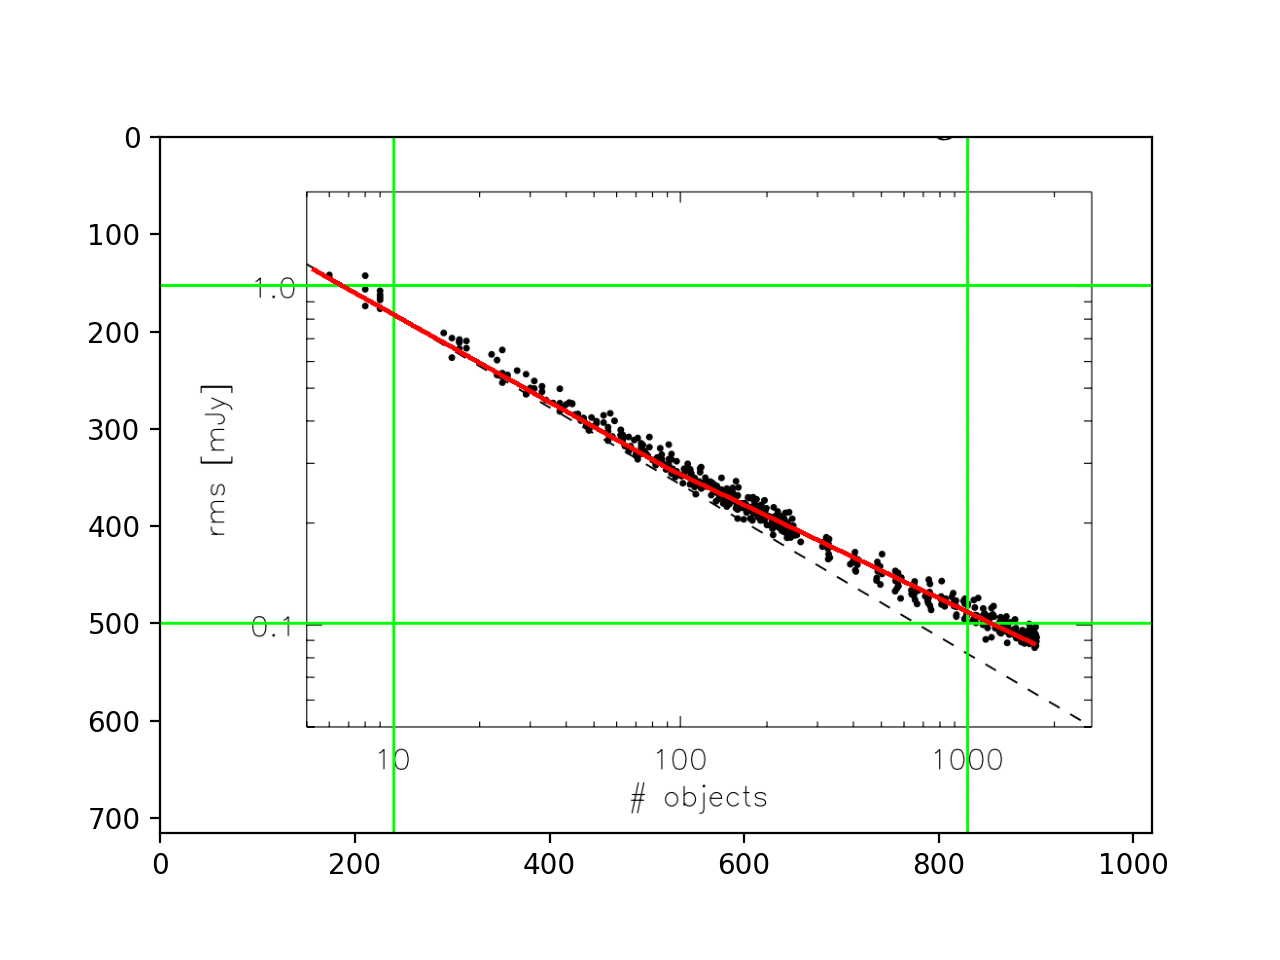

In [93]:
pc = [156,136 , 520,340 , 520,340 , 900,522]
img_show(ann=True,pline=True,log=False,conv=False,show = True)

**Conversion for log plot**

In [94]:
scale = ['Linear','ln','log_10']
dropdown_l = widgets.Dropdown(options=scale, description="Original plot scale:")
display(dropdown_l)

Dropdown(description='Original plot scale:', options=('Linear', 'ln', 'log_10'), value='Linear')

In [95]:
img_show(ann=True,pline=True,log=dropdown_l.value,conv=True, show = False)

The converted polyline coordinate pairs are
[[ 0.71525424  0.04899135]
 [ 1.94915254 -0.5389049 ]
 [ 1.94915254 -0.5389049 ]
 [ 3.23728814 -1.06340058]]
Linear values are
[[5.19103835e+00 1.11941560e+00]
 [8.89513497e+01 2.89131295e-01]
 [8.89513497e+01 2.89131295e-01]
 [1.72698329e+03 8.64170474e-02]]
